In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*


In [3]:
df_test = pd.read_csv("1533148642_test.csv")

In [4]:
df_test.shape

(1459, 80)

In [5]:
df_train = pd.read_csv("1533148642_train.csv")

In [6]:
df_train.shape

(1460, 81)

In [7]:
Trainingdatasize = df_test.shape[0]

In [8]:
Trainingdatasize

1459

In [9]:
df = df_test.append(df_train)

In [10]:
df[df.duplicated() ==  True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [11]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [13]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [14]:
df['Id'].value_counts()

2047    1
1088    1
1084    1
1082    1
1080    1
       ..
2532    1
483     1
2530    1
481     1
2049    1
Name: Id, Length: 2919, dtype: int64

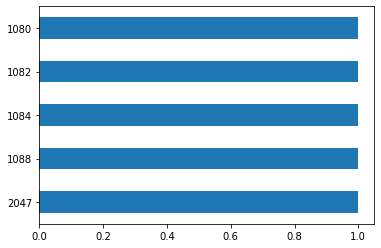

In [15]:
df['Id'].value_counts().head().plot(kind='barh')

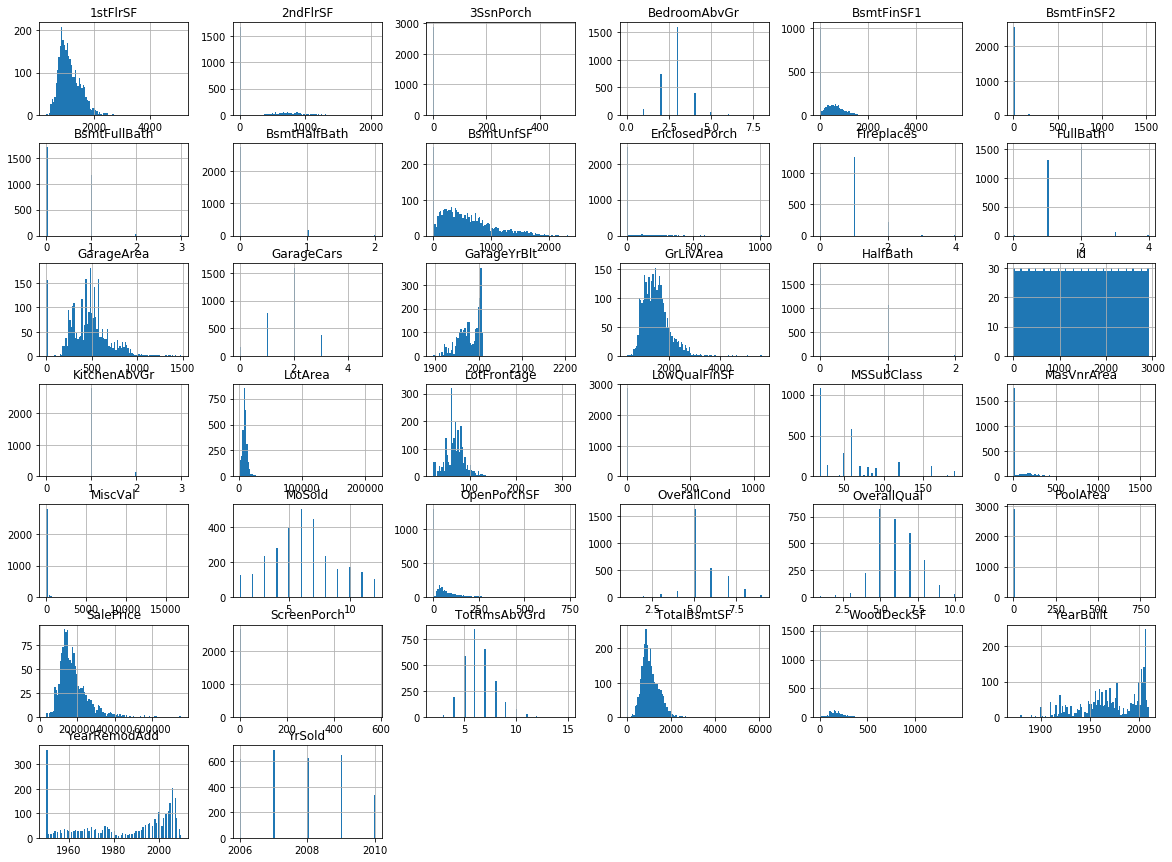

In [16]:
%matplotlib inline
df.hist(bins=100, figsize=(20,15))
plt.show()

In [17]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [18]:
df1.duplicated().sum()

0

In [19]:
df1.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          1
GarageCars          1
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage       486
LowQualFinSF        0
MSSubClass          0
MasVnrArea         23
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         1
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

In [20]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,5,0,NaN,120,5,882.0,140,1961,1961,2010
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,6,0,NaN,0,6,1329.0,393,1958,1958,2010
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,5,0,NaN,0,6,928.0,212,1997,1998,2010
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,6,0,NaN,0,7,926.0,360,1998,1998,2010
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,8,0,NaN,144,5,1280.0,0,1992,1992,2010


In [21]:
df1['LotFrontage'] = df1['LotFrontage'].fillna(df1['LotFrontage'].median())
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median())
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(df1['MasVnrArea'].median())
df1['BsmtFinSF1'] = df1['BsmtFinSF1'].fillna(df1['BsmtFinSF1'].median())
df1['BsmtFinSF2'] = df1['BsmtFinSF2'].fillna(df1['BsmtFinSF2'].median())
df1['BsmtFullBath'] = df1['BsmtFullBath'].fillna(df1['BsmtFullBath'].median())
df1['BsmtHalfBath'] = df1['BsmtHalfBath'].fillna(df1['BsmtHalfBath'].median())
df1['BsmtUnfSF'] = df1['BsmtUnfSF'].fillna(df1['BsmtUnfSF'].median())
df1['GarageArea'] = df1['GarageArea'].fillna(df1['GarageArea'].median())
df1['GarageCars'] = df1['GarageCars'].fillna(df1['GarageCars'].median())
df1['TotalBsmtSF'] = df1['TotalBsmtSF'].fillna(df1['TotalBsmtSF'].median())

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 38 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtUnfSF        2919 non-null float64
EnclosedPorch    2919 non-null int64
Fireplaces       2919 non-null int64
FullBath         2919 non-null int64
GarageArea       2919 non-null float64
GarageCars       2919 non-null float64
GarageYrBlt      2919 non-null float64
GrLivArea        2919 non-null int64
HalfBath         2919 non-null int64
Id               2919 non-null int64
KitchenAbvGr     2919 non-null int64
LotArea          2919 non-null int64
LotFrontage      2919 non-null float64
LowQualFinSF     2919 non-null int64
MSSubClass       2919 non-null int64
MasVnrArea       2919 no

In [23]:
df1.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFullBath        0
BsmtHalfBath        0
BsmtUnfSF           0
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          0
GarageCars          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage         0
LowQualFinSF        0
MSSubClass          0
MasVnrArea          0
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         0
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

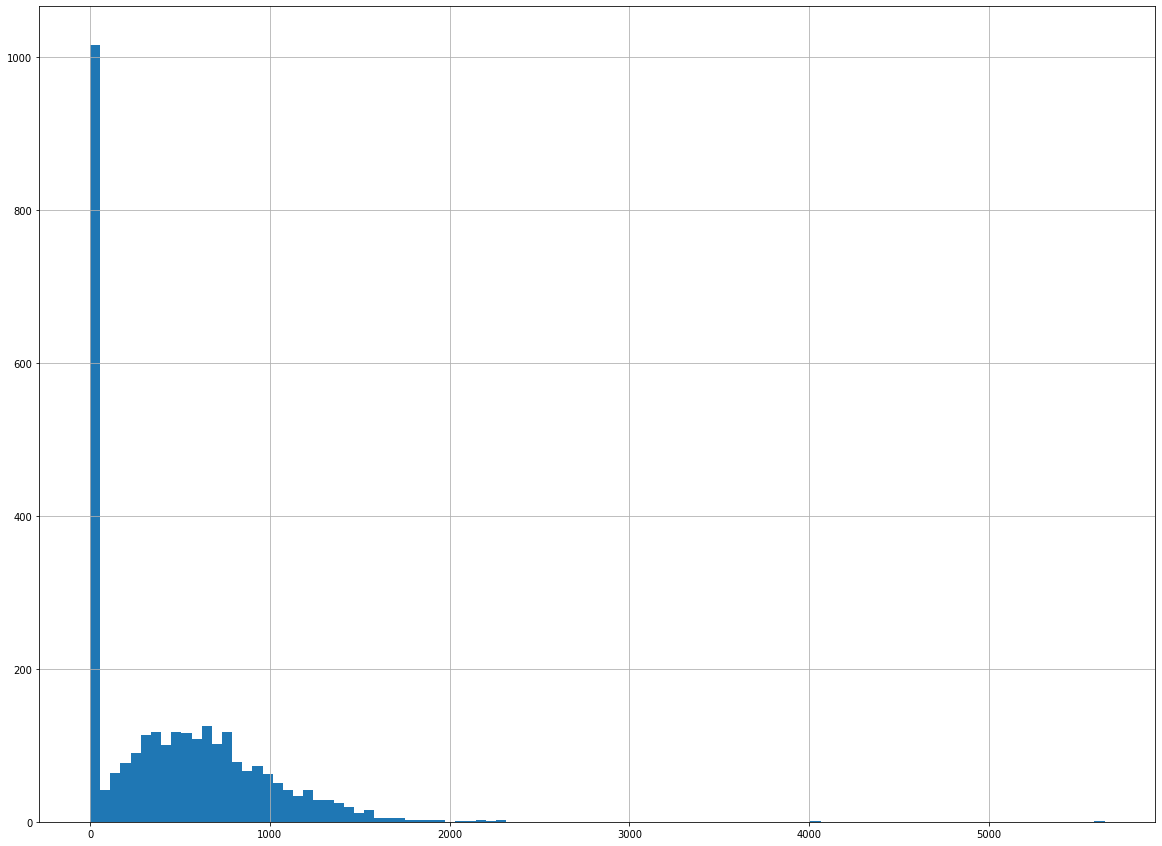

In [24]:
%matplotlib inline
df['BsmtFinSF1'].hist(bins=100, figsize=(20,15))
plt.show()

In [25]:
df1.isnull().sum().sum()

1459

In [26]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,5,0,NaN,120,5,882.0,140,1961,1961,2010
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,6,0,NaN,0,6,1329.0,393,1958,1958,2010
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,5,0,NaN,0,6,928.0,212,1997,1998,2010
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,6,0,NaN,0,7,926.0,360,1998,1998,2010
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,8,0,NaN,144,5,1280.0,0,1992,1992,2010


In [27]:
[df2[elem].unique() for elem in df2]

[array([nan, 'Pave', 'Grvl'], dtype=object),
 array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object),
 array(['TA', 'Po', 'Fa', 'Gd', nan], dtype=object),
 array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object),
 array(['Rec', 'ALQ', 'GLQ', 'Unf', 'BLQ', 'LwQ', nan], dtype=object),
 array(['LwQ', 'Unf', 'Rec', 'BLQ', 'GLQ', 'ALQ', nan], dtype=object),
 array(['TA', 'Gd', 'Ex', 'Fa', nan], dtype=object),
 array(['Y', 'N'], dtype=object),
 array(['Feedr', 'Norm', 'PosN', 'RRNe', 'Artery', 'RRNn', 'PosA', 'RRAn',
        'RRAe'], dtype=object),
 array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery', 'RRNn', 'RRAn', 'RRAe'],
       dtype=object),
 array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix', nan], dtype=object),
 array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object),
 array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object),
 array(['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd', 'CemntBd',
        'WdShing', 'BrkFace', 'AsbShng', 'BrkComm', 'Stucco', 'AsphShn',
        nan, 'CBlock', 

In [28]:
#Replacing MSSubClass
MSSubClassin = [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
MSSubClassout = ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES',
            '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL',
             'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES',
              '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [29]:
Streetin = ['Grv1', 'Pave']
Streetout = ['Street_Gravel', 'Street_Paved']

In [30]:
Alleyin = ['Grv1', 'Pave', 'NA']
Alleyout = ['Street_Gravel', 'Street_Paved', np.NaN]

In [31]:
df2.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
0,NaN,1Fam,TA,No,Rec,LwQ,TA,Y,Feedr,Norm,...,NaN,NAmes,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
1,NaN,1Fam,TA,No,ALQ,Unf,TA,Y,Norm,Norm,...,Gar2,NAmes,Y,NaN,CompShg,Hip,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,Gilbert,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,TA,No,GLQ,Unf,TA,Y,Norm,Norm,...,NaN,Gilbert,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
4,NaN,TwnhsE,TA,No,ALQ,Unf,Gd,Y,Norm,Norm,...,NaN,StoneBr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [32]:
df2 = pd.get_dummies(df2, drop_first=True)

In [33]:
df1['MSSubClass'] = df1['MSSubClass'].replace(MSSubClassin, MSSubClassout)

In [34]:
df1 = pd.get_dummies(df1, drop_first=True)

In [35]:
df1 = pd.concat([df1,df2],axis=1)

In [36]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,0,0,0,1,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,0,0,0,1,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,0,0,0,1,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,0,0,0,1,1,0


In [37]:
df1.shape

(2919, 261)

In [51]:
new_train.isnull().sum().sum()

0

In [ ]:
new_train.isnull().sum().sum()

In [38]:
new_train = df1[Trainingdatasize:]
new_test = df1[:Trainingdatasize]

In [39]:
new_train.isnull().sum().sum()

0

In [40]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


def OptimalRegression(dataset, y_name):
    
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    et = ExtraTreeRegressor()
    gbr = GradientBoostingRegressor()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    
    algos = [r, l, e, et, gbr]
    algo_names = ['Ridge', 'Lasso','ElasticNet','Extra Tree','Gradient Boost']
    
    result = pd.DataFrame(columns = ['Mean Squared Error', 'R2'], index = algo_names)
    
    meansquarederror = []
    r2 = []
    largest_r2 = 0
    bestmodel = 0
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        meansquarederror.append(mean_squared_error(y_test, algo.predict(x_test)))
        r2val = r2_score(y_test, algo.predict(x_test))
        r2.append(r2val)
        if(r2val > largest_r2):
            largest_r2 = r2val
            bestmodel = algo
        
    result['Mean Squared Error'] = meansquarederror
    result['R2'] = r2
    
    stats = result.sort_values('R2', ascending = False)
    
    return bestmodel, stats


    

In [41]:
model, stats = OptimalRegression(new_train,'SalePrice')
stats

,Mean Squared Error,R2
Gradient Boost,8.619274e+08,0.875189
Extra Tree,1.914501e+09,0.722771
Ridge,2.457609e+09,0.644126
ElasticNet,2.642159e+09,0.617403
Lasso,3.548774e+09,0.486121


In [42]:
new_test['SalePrice'] = model.predict(new_test.drop('SalePrice', axis=1))

In [43]:
out_df = new_test[['Id','SalePrice']]

In [44]:
out_df.head()

,Id,SalePrice
0,1461,121357.169319
1,1462,159339.522692
2,1463,191178.809817
3,1464,184092.626455
4,1465,199647.365230


In [45]:
out_df.to_csv("My_Prediction.csv",index = False)

In [46]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*


In [47]:
out_df.shape

(1459, 2)